### New loading scripts

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
scoring_main_path   = '/vol/sleepstudy/datasets/mesa/scorings/'
scorings_nsrr       = scoring_main_path + 'nsrr/'
scorings_somnolyzer = scoring_main_path + 'somnolyzer/'

In [3]:
def show_comp(mesa_id):
    hypnogram_nsrr = pd.read_csv(scorings_nsrr + f'hypnogram/hypnogram-{mesa_id:04}.csv')['0']
    events_nsrr    = pd.read_csv(scorings_nsrr + f'events/events-{mesa_id:04}.csv')
    hypnogram_somnolyzer = pd.read_csv(scorings_somnolyzer + f'hypnogram/hypnogram-{mesa_id:04}.csv')['0']
    events_somnolyzer    = pd.read_csv(scorings_somnolyzer + f'events/events-{mesa_id:04}.csv')

    _, axs = plt.subplots(4, 1, figsize=(20, 8), sharex=True)

    hypnogram_nsrr.plot(ax=axs[0])
    events_nsrr[['OSA', 'CSA', 'HYP']].plot(ax=axs[1])
    hypnogram_somnolyzer.plot(ax=axs[2])
    events_somnolyzer[['OSA', 'CSA', 'HYP']].plot(ax=axs[3])
    axs[0].legend(['[NSRR] Hypnogram'], loc='upper right')
    axs[2].legend(['[Somnolyzer] Hypnogram'], loc='upper right')

    plt.tight_layout()
    plt.show()

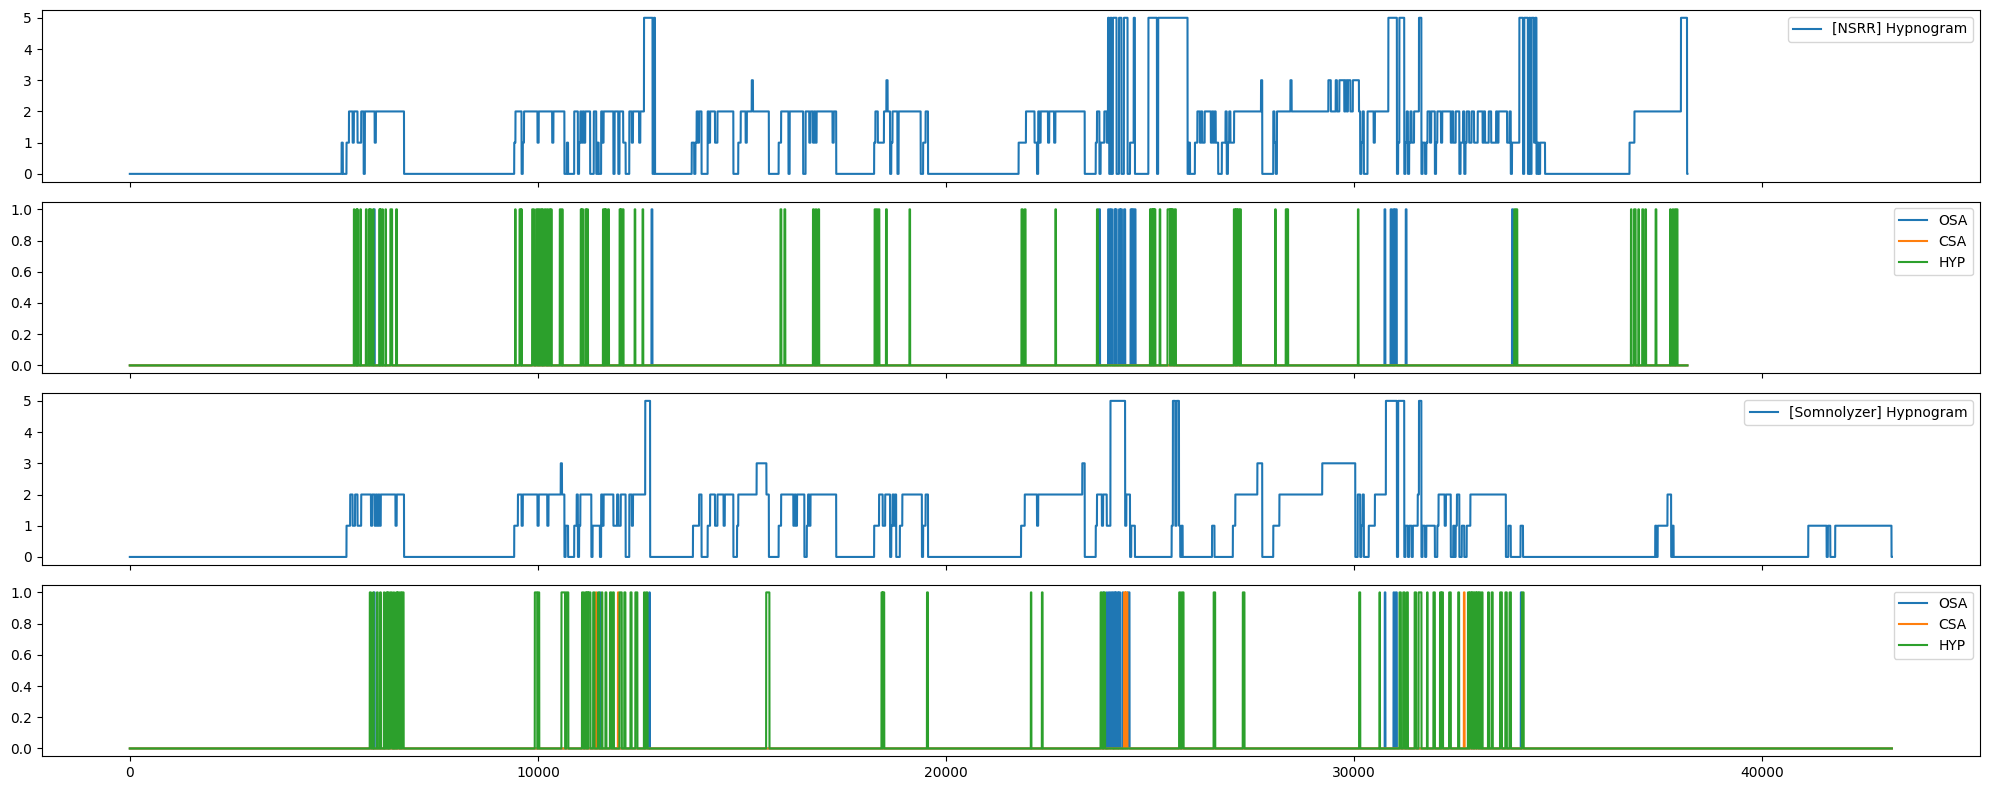

In [4]:
show_comp(1)

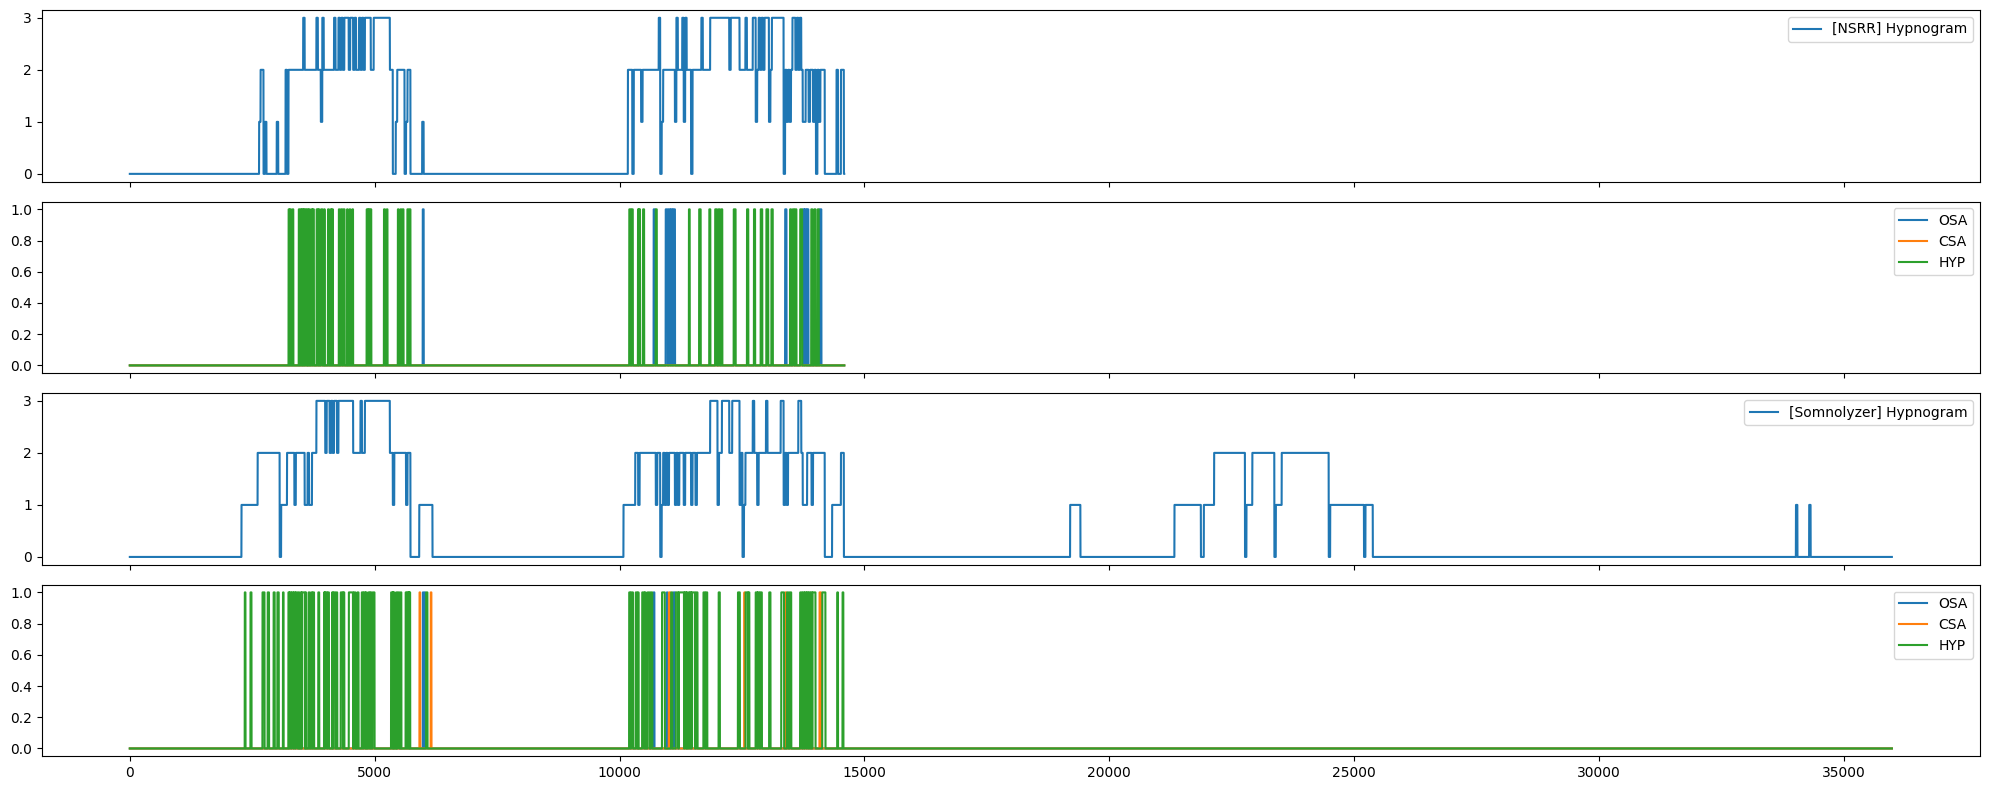

In [5]:
show_comp(10)

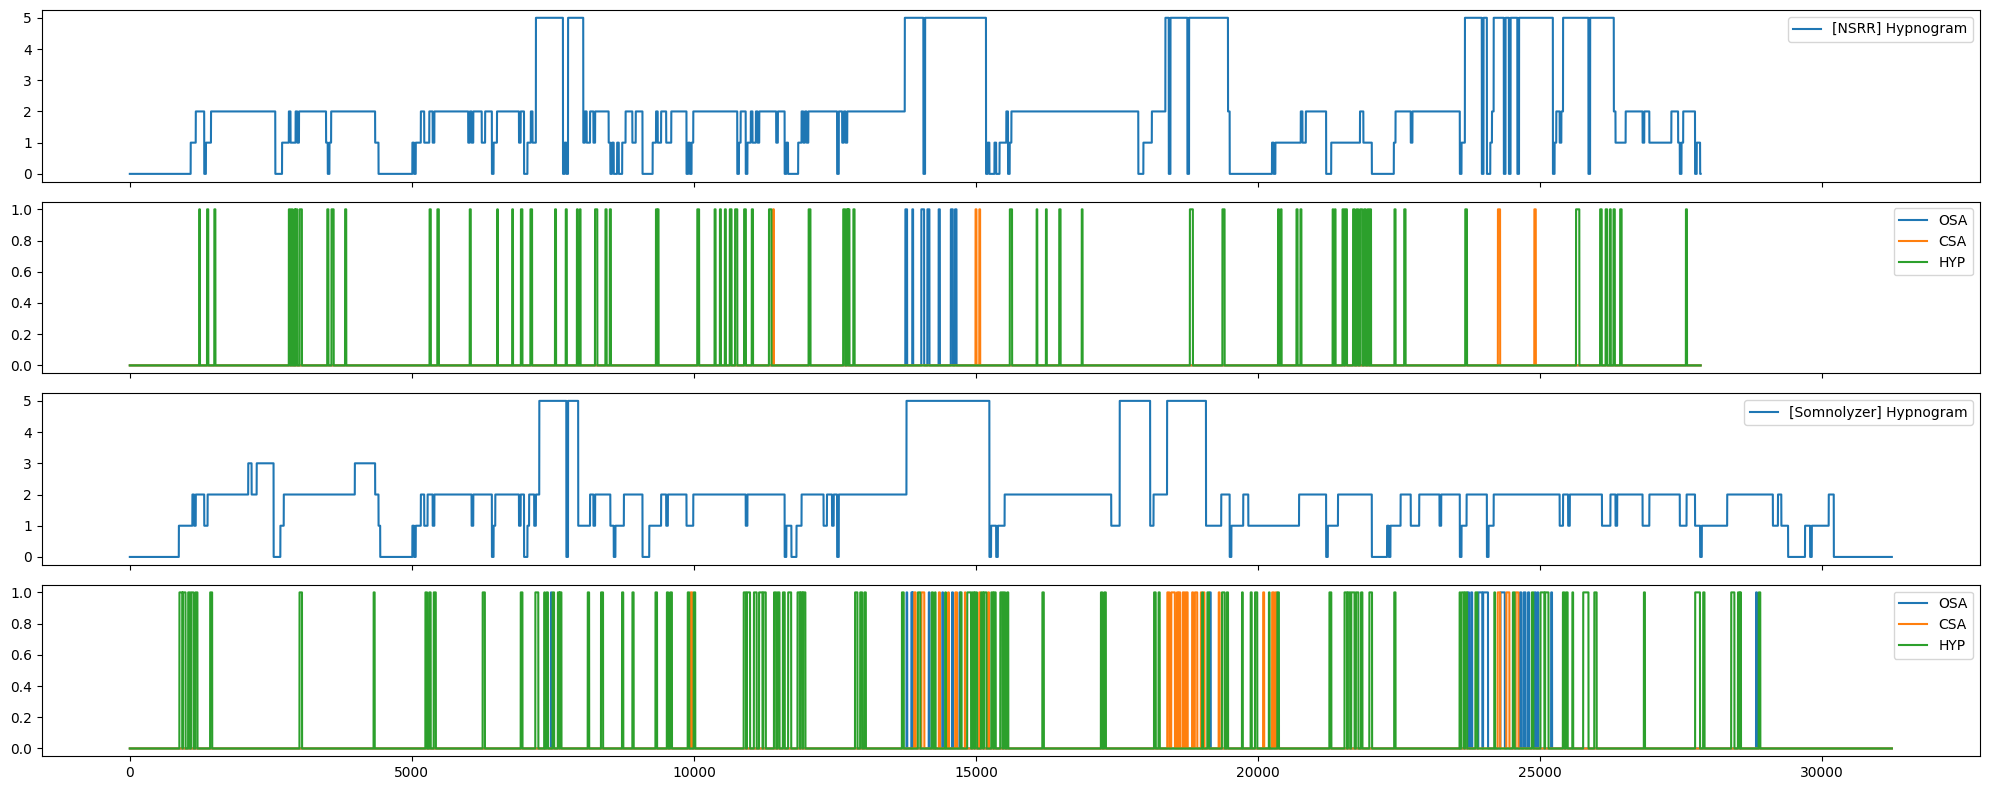

In [6]:
show_comp(301)

### Recording

In [7]:
from wearsed.dataset.Recording import Recording

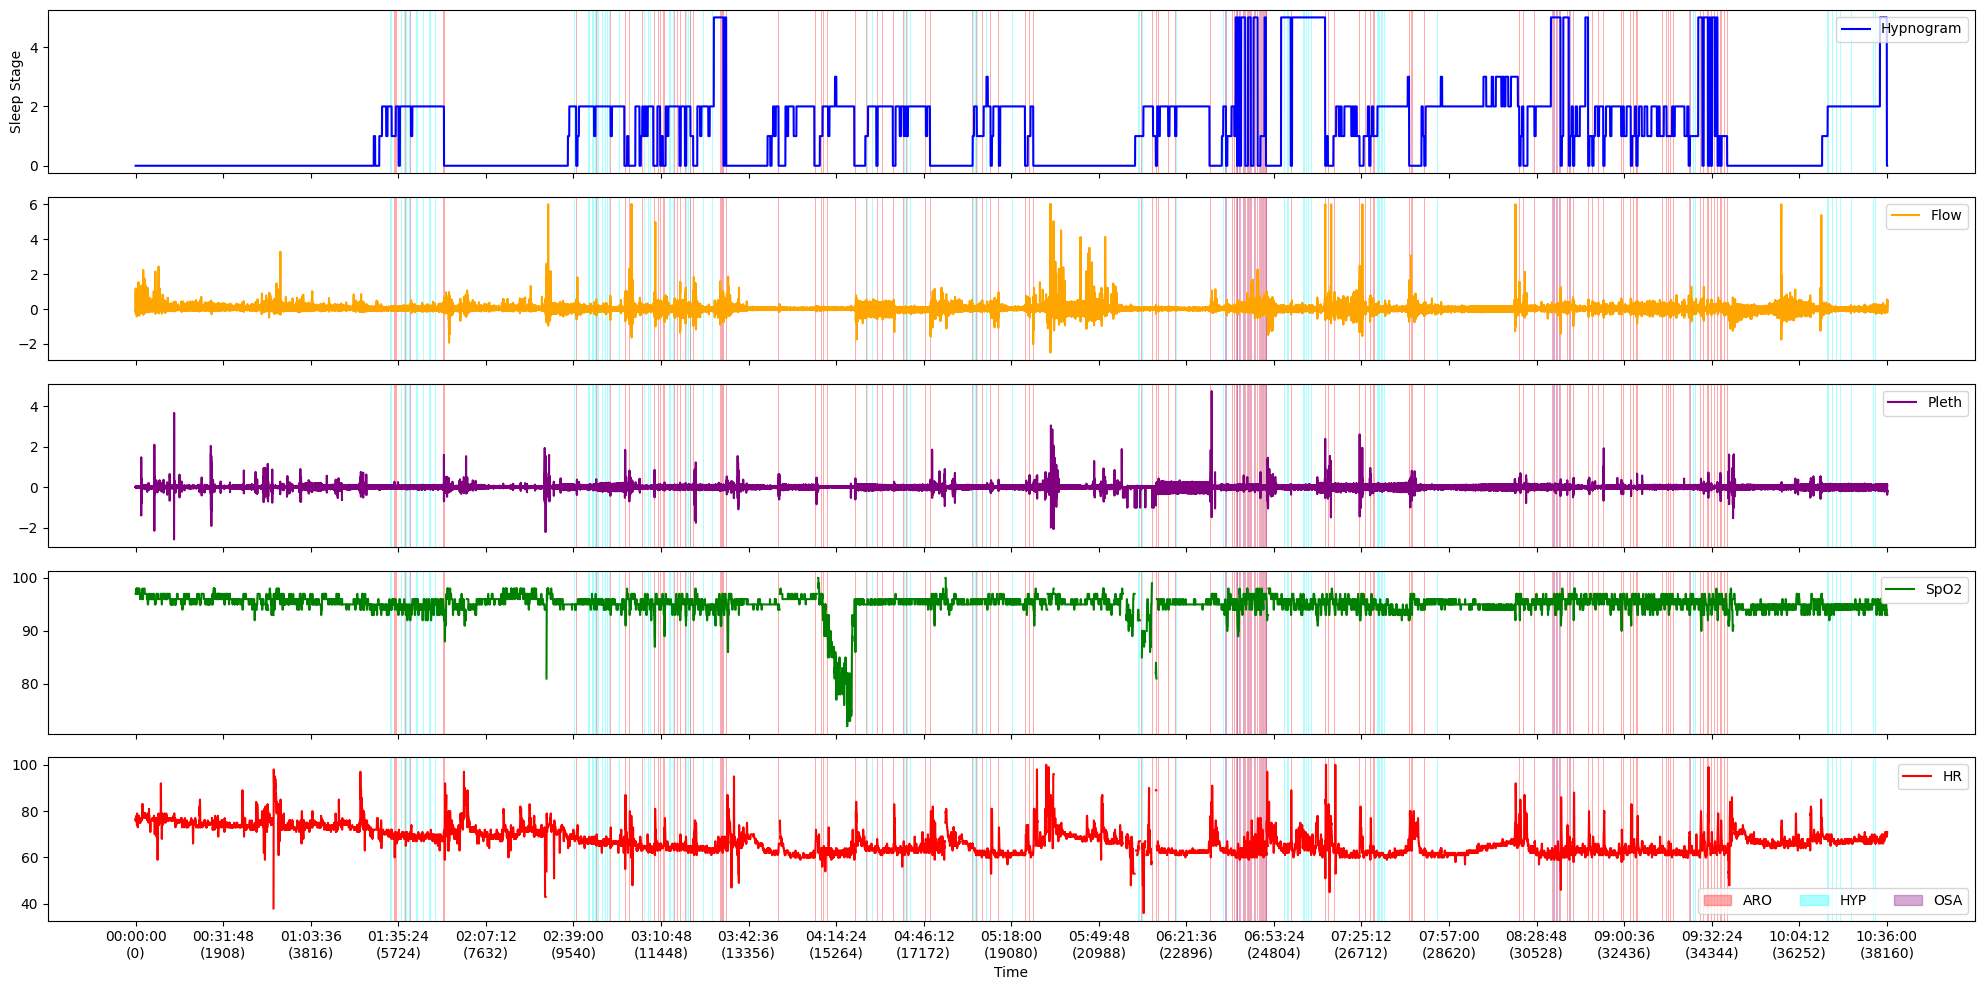

In [8]:
r1_nsrr = Recording(1, scoring_from='nsrr', events_as_list=True)
r1_nsrr.look_at()

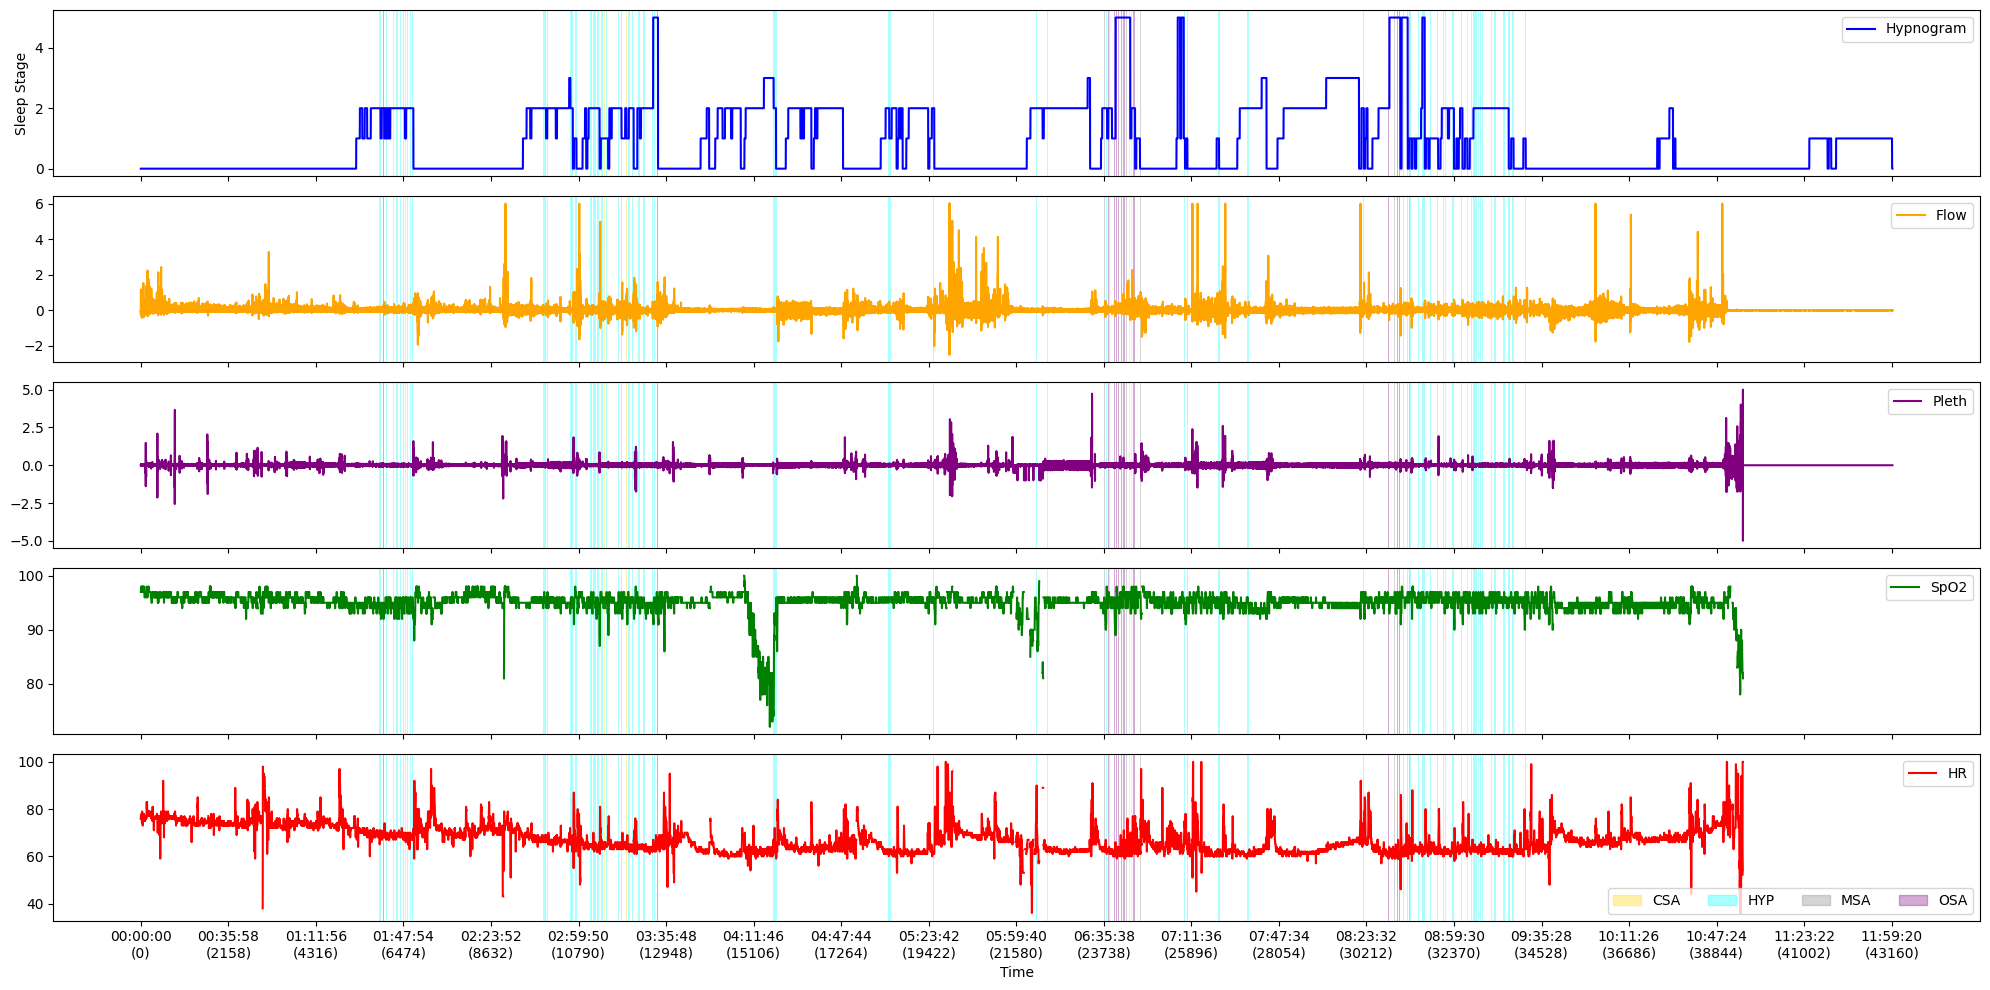

In [9]:
r1_somnolyzer = Recording(1, scoring_from='somnolyzer', events_as_list=True)
r1_somnolyzer.look_at()

### Dataset

In [28]:
from wearsed.dataset.WearSEDDataset import WearSEDDataset
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
dataset = WearSEDDataset(mesaid_path='../wearsed/dataset/data_ids/', scoring_from='somnolyzer', signals_to_read=['SpO2', 'Pleth'], return_recording=False)

In [24]:
signals, labels = dataset[0]
print(signals.shape)
sig_hyp, sig_spo2, sig_pth = signals[0], signals[1], signals[2:].view(-1)
print(sig_hyp.shape, sig_spo2.shape, sig_pth.shape)

torch.Size([1, 43178]) torch.Size([1, 43178]) torch.Size([256, 43178])
torch.Size([258, 43178])
torch.Size([43178]) torch.Size([43178]) torch.Size([11053568])


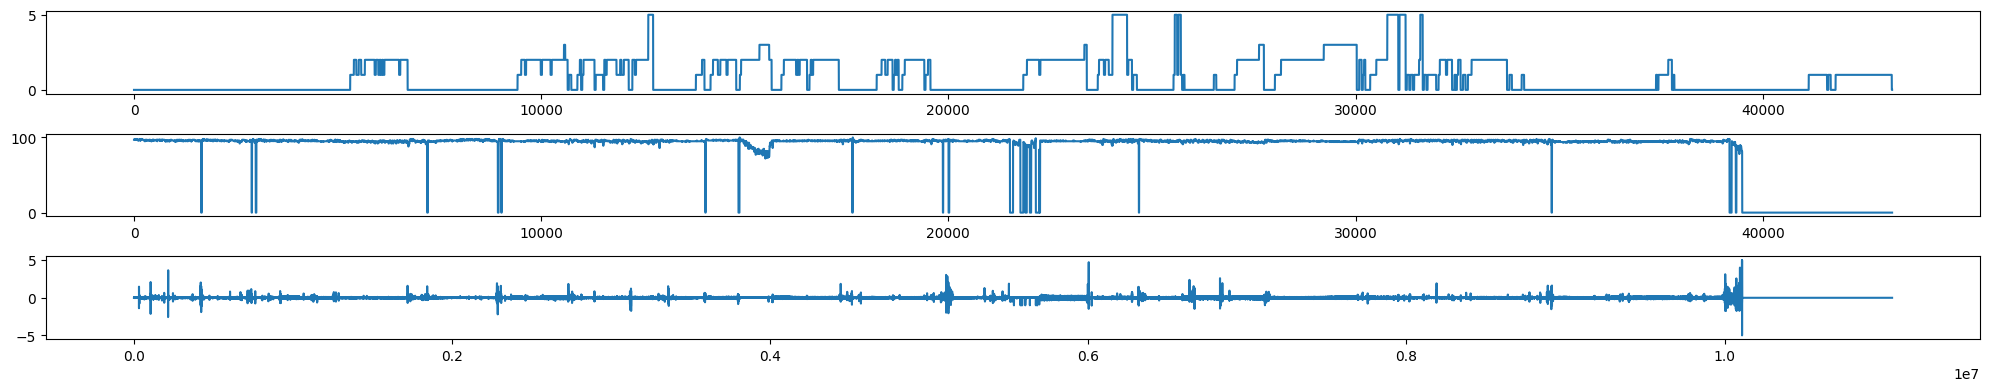

In [31]:
_, axs = plt.subplots(3, 1, figsize=(20, 9))

pd.Series(sig_hyp).plot(figsize=(20, 4), ax=axs[0])
pd.Series(sig_spo2).plot(figsize=(20, 4), ax=axs[1])
pd.Series(sig_pth).plot(figsize=(20, 4), ax=axs[2])

plt.tight_layout()
plt.show()